In [ ]:
 # Title name:              Heart Disease Dataset

In [4]:
import pandas as pd
df=pd.read_csv("new pandas project.csv")
df                                                 # importing data into pandas

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,Male,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,Male,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,Female,0,110,254,0,0,159,0,0.0,2,0,2,1


In [2]:
df.info              #  To viewing data's column in details

<bound method DataFrame.info of       age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    Male   0       125   212    0        1      168      0      1.0   
1      53    Male   0       140   203    1        0      155      1      3.1   
2      70    Male   0       145   174    0        1      125      1      2.6   
3      61    Male   0       148   203    0        1      161      0      0.0   
4      62  Female   0       138   294    1        1      106      0      1.9   
...   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    Male   1       140   221    0        1      164      1      0.0   
1021   60    Male   0       125   258    0        0      141      1      2.8   
1022   47    Male   0       110   275    0        0      118      1      1.0   
1023   50  Female   0       110   254    0        0      159      0      0.0   
1024   54    Male   0       120   188    0        1      113      0      1.4   

      s

In [3]:
df.shape        # i use df.shape to view how many rows and columns is there in data set and they are 1025 columns and 25 rows

(1025, 14)

In [4]:
df.isnull().sum()          # checking null values in the dataset 0 means no null values in the data set

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
import pandas as pd       # importing pandas
import seaborn as sns     # importing seaborn
import numpy as np        # importing numpy
import matplotlib as plt  # importing matplotlib

<Axes: xlabel='age', ylabel='Count'>

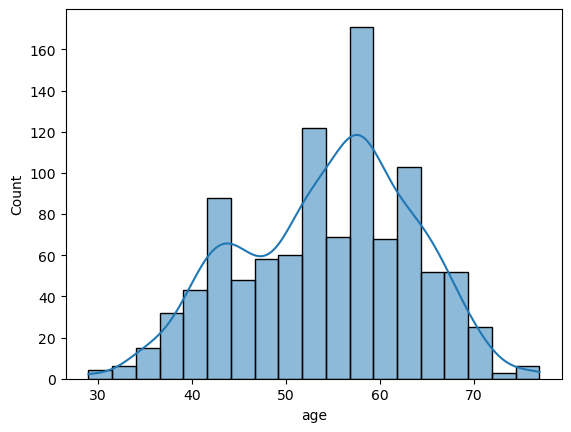

In [6]:
sns.histplot(x="age",data=df,kde=True)     # and i put histogram plot for age and its an normal distribution

<Axes: xlabel='age'>

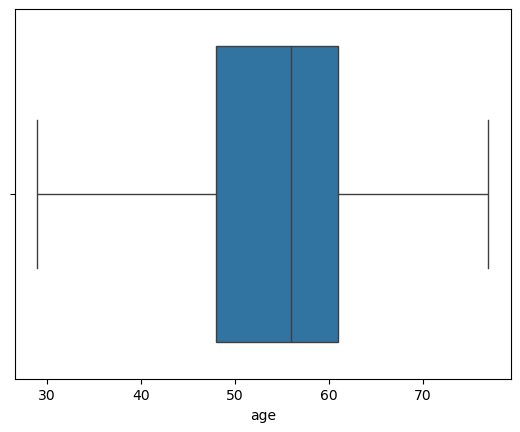

In [7]:
sns.boxplot(x="age",data=df)    # i analyse any outliers in the dataset and there is no outlier in the dataset 

<Axes: xlabel='gender', ylabel='age'>

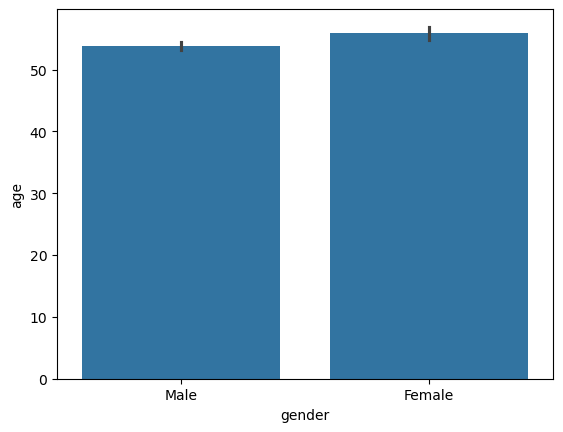

In [20]:
sns.barplot(x="gender",y="age",data=df)  # and i using to see an which gender getting higher diseases and i get females have more in this bar chart

AttributeError: module 'matplotlib' has no attribute 'title'

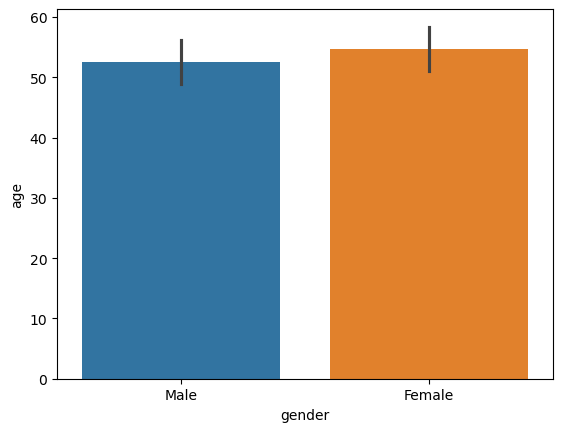

In [14]:
# Compute counts
counts = df.groupby(['age', 'gender']).size().reset_index(name='count')

sns.barplot(x='gender', y='age', hue='gender', data=counts)
plt.title('Count of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Count')

# and i see which age type to getting an heart diseases in the dataset and 50 to 60 aged persons have more in this bar chart

<Axes: xlabel='chol', ylabel='Count'>

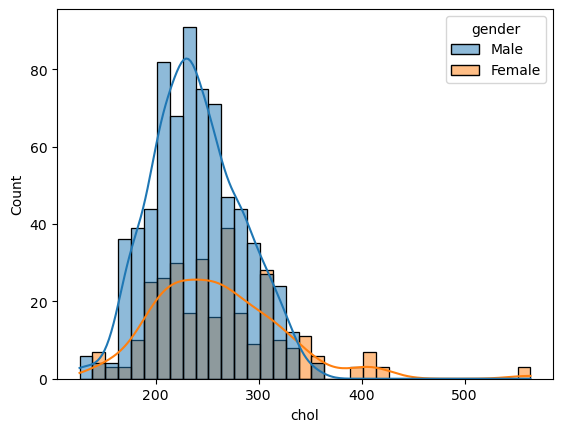

In [35]:
sns.histplot(data=df, x="chol", hue="gender", kde=True, multiple="layer")

# i put histogram plot for cholestrol and i got male has getting more cholestrol in this chart and theya re above 80 persons

In [ ]:
# why i analyse an Cholesterol ?
      # An high cholesterol guaranted to comes an heart attack so  i analyse an cholestrol for male and female based an age and i get more male persons 
      # are getting heart attack or heart diseases and more than 80 male members are getting more cholestrol and that's why i'm taking this analyse

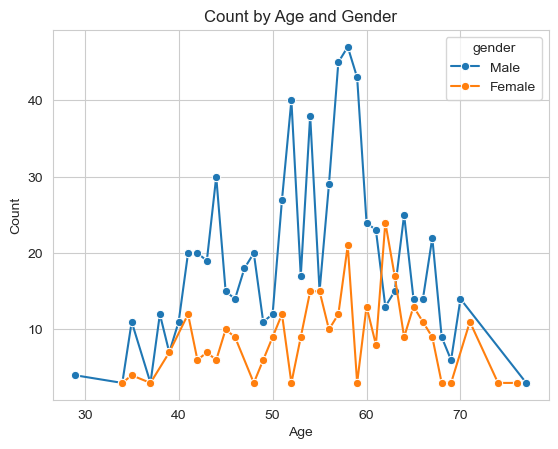

In [16]:
age_gender_counts = df.groupby(['age', 'gender']).size().reset_index(name='count')
sns.lineplot(data=age_gender_counts, x='age',y='count',hue='gender',marker='o')
plt.title("Count by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)


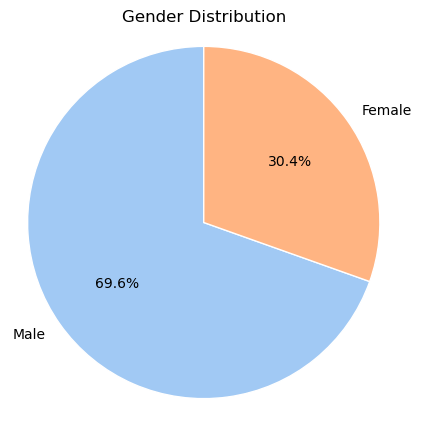

In [12]:
# Your gender counts
gender_counts = df['gender'].value_counts()

# Choose a Seaborn palette
colors = sns.color_palette('pastel')[0:len(gender_counts)]

plt.figure(figsize=(5, 3
                ))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,         # Use Seaborn colors
    wedgeprops={'edgecolor': 'white'}  # White borders between slices
)
plt.title("Gender Distribution")
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.show()


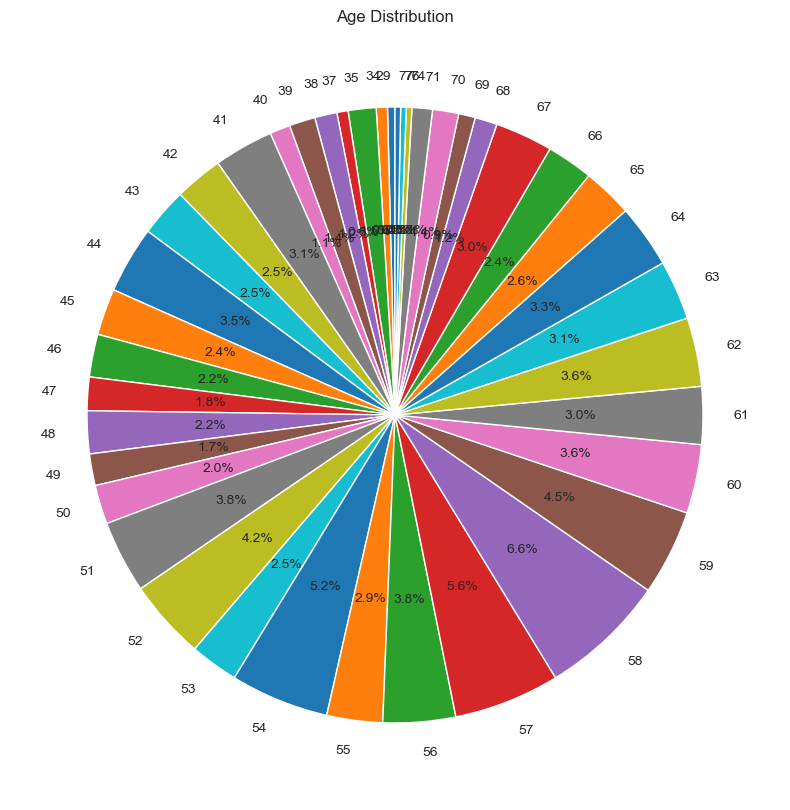

In [14]:

# Group by age and count
age_counts = df['age'].value_counts().sort_index()

# Pie chart for age
plt.figure(figsize=(10, 10))
plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Age Distribution")
plt.show()

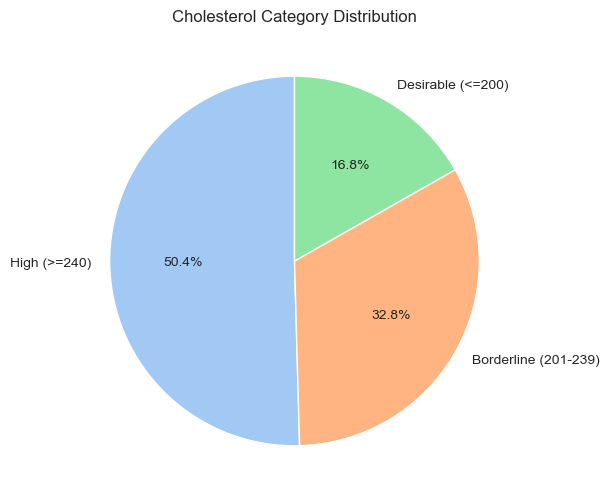

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("new pandas project.csv")

# Define cholesterol ranges
bins = [0, 200, 239, 1000]  # Values in mg/dL
labels = ['Desirable (<=200)', 'Borderline (201-239)', 'High (>=240)']

# Create a new column for categories
df['chol_category'] = pd.cut(df['chol'], bins=bins, labels=labels, right=True)

# Count each category
chol_counts = df['chol_category'].value_counts()

# Apply Seaborn style
sns.set_style("whitegrid")

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    chol_counts,
    labels=chol_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Cholesterol Category Distribution")
plt.show()

In [ ]:
# conclusion :
           # Females show a higher prevalence of heart disease compared to males.
           # Risk increases significantly with age, especially in middle-aged and elderly groups.
           # A large portion of patients have high cholesterol levels.
           # High cholesterol is strongly linked to heart disease risk in the dataset.
           # Visualizations (pie, bar charts) made patterns easy to interpret.
           # Age and gender trends suggest targeted health awareness is needed.
           # Cholesterol control could help reduce heart disease cases.
           # Data analysis proved effective in identifying high-risk groups.
           # Insights can guide prevention strategies and public health planning.
           # Cholesterol management through balanced diet and physical activity could lower disease risk.
           # Regular health screenings could help detect heart problems earlier, especially in high-risk age groups.
           # Older adults are more likely to develop multiple heart risk factors
           # Cholesterol levels directly correlate with heart disease occurrence in the dataset.
           # High cholesterol is common among patients, making it a critical factor to monitor.
           # Cholesterol levels directly correlate with heart disease occurrence in the dataset.

In [1]:
import time
import os

message = "THANK YOU ALL"
heart = """
   ***     ***
  *****   *****
 ******* *******
 ****************
  ***************
     *********
       *****
        ***
         *
"""

# Clear the screen
os.system('cls' if os.name == 'nt' else 'clear')

# Print the message with animation
for char in message:
    print(char, end=' ', flush=True)
    time.sleep(0.3)

print("\n\n" + heart)

T H A N K   Y O U   A L L 


   ***     ***
  *****   *****
 ******* *******
 ****************
  ***************
     *********
       *****
        ***
         *

